# 逻辑回归  Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 逻辑回归
### 读入数据

(100, 3)


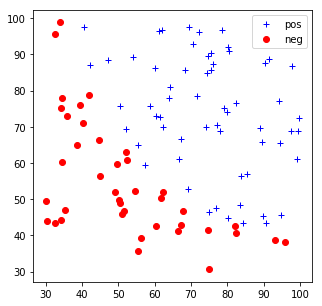

In [3]:
data1 = np.loadtxt('.\data\ex2data1.txt',delimiter=',')
print(data1.shape)

pos1 = np.squeeze(data1[np.where(data1[:,2]==1),:])
neg1 = np.squeeze(data1[np.where(data1[:,2]==0),:])

#将数据展示在坐标系中
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(pos1[:,0],pos1[:,1],'b+',label='pos')
ax.plot(neg1[:,0],neg1[:,1],'ro',label='neg')
plt.legend()
plt.show()

In [4]:
X = data1[:,:-1]
y = data1[:,-1:]

X = np.insert(X,0,1,axis=1)
print(X.shape,y.shape)

(100, 3) (100, 1)


### 定义代价函数

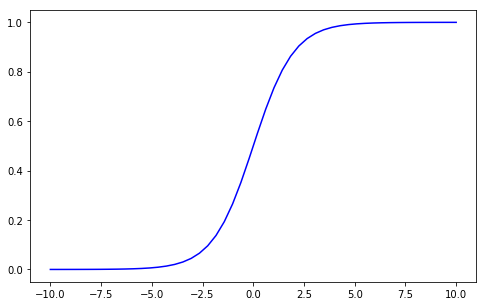

In [5]:
## 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.linspace(-10,10),sigmoid(np.linspace(-10,10)),'b-')
plt.show()

In [6]:
def computeCost(theta,X,y):
    term1 = np.dot(y.T, np.log(sigmoid(np.dot(X,theta))))
    term2 = np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta))))
    return -np.sum(term1+term2)/X.shape[0]

initial_theta = np.zeros((X.shape[1]))
computeCost(initial_theta,X,y)

0.6931471805599452

### 进行梯度下降

[[-11.74749157]
 [  0.09927308]
 [  0.09316497]] 0.2521700370306644


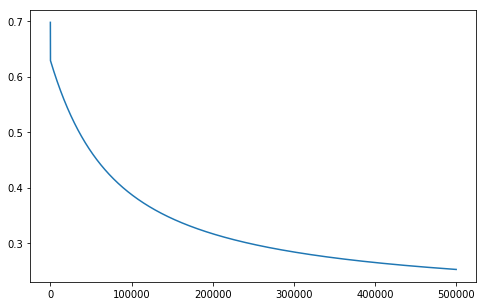

In [7]:
## 首先进行类似线性回归的梯度下降，这种方法表现并不好
## scipy.optimize.minimize也可以实现见下部分
def gradientDescent(theta,X,y,alpha,iters):
    cost = np.zeros(iters)
    for i in range(iters):
        error = sigmoid(np.dot(X,theta)) - y
        for j in range(X.shape[1]):
            theta[j] = theta[j] - (alpha/X.shape[0])*np.sum(error*X[:,j].reshape(X.shape[0],1))
        cost[i] = computeCost(theta,X,y)
    
    return theta,cost

initial_theta = np.zeros((X.shape[1],1))
theta,cost = gradientDescent(initial_theta,X,y,alpha=0.001,iters=500000)
print(theta,min(cost))
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(cost.shape[0]),cost)
plt.show()

### 进行预测并画出决策边界

In [8]:
y_pred = (np.dot(X,theta)>=0.5).astype(int)
print(np.sum(y_pred==y)/100)

0.89


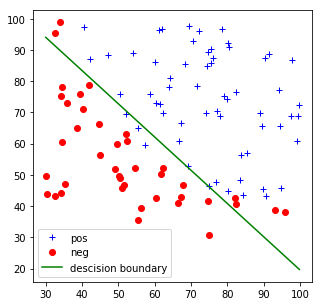

In [9]:
## 划定边界条件
## 边界条件应该由 theta0 + theta1*x1 + theta2*x2 = 0得到


boundary_x = np.array([np.min(X[:,1:]),np.max(X)])
boundary_y = -theta[0]/theta[2]-theta[1]/theta[2]*boundary_x

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(pos1[:,0],pos1[:,1],'b+',label='pos')
ax.plot(neg1[:,0],neg1[:,1],'ro',label='neg')
ax.plot(boundary_x,boundary_y,'g-',label='descision boundary')
plt.legend()
plt.show()


## 正则化逻辑回归
### 读入数据

(118, 3)
(118, 2) (118,)


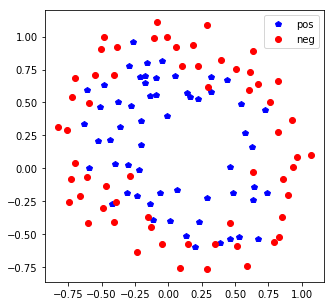

In [10]:
data2 = np.loadtxt('.\data\ex2data2.txt',delimiter=',')
print(data2.shape)

pos2 = np.squeeze(data2[np.where(data2[:,2]==1),:])
neg2 = np.squeeze(data2[np.where(data2[:,2]==0),:])

X2 = data2[:,:-1]
y2 = data2[:,-1]
print(X2.shape,y2.shape)
#将数据展示在坐标系中
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
ax.plot(neg2[:,0],neg2[:,1],'ro',label='neg')
plt.legend()
plt.show()

### 特征映射

In [11]:
def featureMap(X,degree):
    res_map = np.ones((X.shape[0],1))
    for i in range(1,degree + 1):
        for j in range(0,i+1):
            term1 = X[:,0] ** j
            term2 = X[:,1] ** (i-j)
            term = (term1*term2).reshape(X.shape[0],1)
            res_map = np.concatenate((res_map,term),axis=1)
    return res_map

X2mapped = featureMap(X2,6)
print(X2mapped.shape)

(118, 28)


### 定义代价函数并进行梯度下降

In [12]:
def computeRegularizedCost(theta,X,y,l=1):
    term_regu = np.sum(theta[1:]**2)*l/(2*X.shape[0])
    return computeCost(theta,X,y) + term_regu

initial_theta2 = np.zeros((X2mapped.shape[1]))
computeRegularizedCost(initial_theta2,X2mapped,y2,l=1)

0.6931471805599453

In [13]:
def computeRegularizedGradient(theta, X, y,l=1):
    term_regu = theta[1:]*l/X.shape[0]
    term = np.dot(X.T, (sigmoid(np.dot(X,theta))-y))
    return term + np.concatenate((np.array([0]),term_regu))

computeRegularizedGradient(initial_theta2,X2mapped,y2)

array([1.        , 0.009177  , 2.216995  , 4.44445199, 1.35715703,
       5.94066747, 2.77022569, 0.96670847, 0.8642242 , 2.16600649,
       4.63773242, 0.36532059, 1.51748594, 0.26423021, 4.64313757,
       3.65894222, 0.5282023 , 0.68891005, 0.3995998 , 0.51092021,
       2.35654811, 4.57764909, 0.16242249, 0.85727509, 0.04820335,
       0.74525354, 0.12949348, 3.66168682])

In [15]:
from scipy import optimize
l=1
theta2 = np.zeros((X2mapped.shape[1]))
result2 = optimize.minimize(computeRegularizedCost, theta2, args=(X2mapped, y2, l),  method='BFGS', options={"maxiter":500, "disp":True} )
theta2 = np.array(result2.x)
mincost = result2.fun
print(theta2,mincost)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
[ 1.27268734  1.18096648  0.6255701  -1.43194155 -0.91761449 -2.01919805
 -0.17485801 -0.35703398 -0.36513113  0.12375939 -1.19282585 -0.27464159
 -0.61603986 -0.0512972  -1.458438   -0.45613319 -0.29525878 -0.27782696
 -0.04499807 -0.20570046 -0.24270355 -0.92460144 -0.14389208 -0.32759335
  0.01543393 -0.29265654  0.02762809 -1.0437789 ] 0.5290027422900322


### 预测划定决策边界

In [16]:
y_pred = (sigmoid(np.dot(X2mapped,theta2))>=0.5).astype(int)
print(np.sum(y_pred == y2)/X2mapped.shape[0])

0.8305084745762712


In [19]:
def plotBoundary(theta, X, y, l=0.):
    result = optimize.minimize(computeRegularizedCost, theta, args=(X, y, l),  method='BFGS', options={"maxiter":500, "disp":True} )
    theta  = np.array(result.x)
    mincost = result2.fun
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = featureMap(np.concatenate((np.array([xvals[i]]),np.array([yvals[j]]))).reshape(1,2),6)
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%l}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")
    

         Current function value: 0.238245
         Iterations: 500
         Function evaluations: 15090
         Gradient evaluations: 503
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 1440
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 660
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 240
         Gradient evaluations: 8


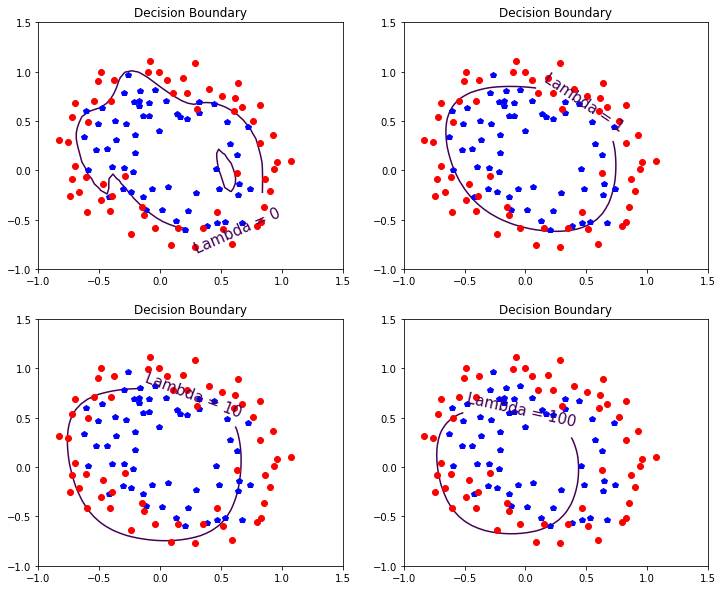

In [20]:
# fig,ax = plt.subplots(figsize=(12,8),ncols=2,nrows=2)
theta2 = np.zeros((X2mapped.shape[1]))
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
plt.plot(neg2[:,0],neg2[:,1],'ro',label='neg')

plotBoundary(theta2,X2mapped,y2,0.)

plt.subplot(222)
plt.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
plt.plot(neg2[:,0],neg2[:,1],'ro',label='neg')

plotBoundary(theta2,X2mapped,y2,1.)

plt.subplot(223)
plt.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
plt.plot(neg2[:,0],neg2[:,1],'ro',label='neg')

plotBoundary(theta2,X2mapped,y2,10.)

plt.subplot(224)
plt.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
plt.plot(neg2[:,0],neg2[:,1],'ro',label='neg')

plotBoundary(theta2,X2mapped,y2,100.)

plt.show()

## 使用sklearn

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X2mapped,y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

(2501, 28)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


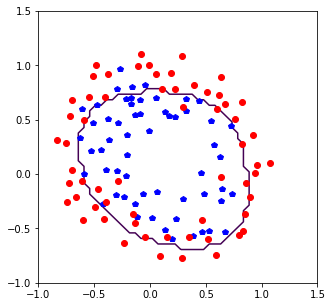

In [42]:
## 画边界
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))
print(myfeature.shape)
for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = featureMap(np.concatenate((np.array([xvals[i]]),np.array([yvals[j]]))).reshape(1,2),6)
        zvals[i,j] = model.predict(myfeaturesij)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(pos2[:,0],pos2[:,1],'bp',label='pos')
ax.plot(neg2[:,0],neg2[:,1],'ro',label='neg')
plt.contour( xvals, yvals, zvals, [0])
plt.show()